In [26]:
#IMPORTO LE LIBRERIE 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#LETTURA FILE CSV capire come rendere globale questa url
url_AIDS_Classification = r'C:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\data\AIDS_Classification_5000.csv'
df = pd.read_csv(url_AIDS_Classification)
print(df.head())

   time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0   988    2   42  71.76131     0     0      0     100       0    1  ...   
1   413    3   30  72.67629     0     1      0     100       0    1  ...   
2  1119    0   37  73.75514     0     1      0      90       0    1  ...   
3   680    3   34  70.03769     0     0      0     100       0    0  ...   
4  1043    3   35  63.02845     0     0      0     100       0    1  ...   

   str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0     1      3        0      0       0   290    408  1870   1671         0  
1     0      1        0      0       0   506    446  1372    523         0  
2     1      3        0      0       0   499    542   609   1474         0  
3     0      1        0      1       0   313    478   780    987         0  
4     0      1        0      1       0   337    761   698   1735         0  

[5 rows x 23 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

# non ci sono dati mancanti

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


In [5]:
duplicati = df.duplicated().sum()
print(duplicati)
# non ci sono duplicati
# df_cleaned = df.drop_duplicates()

0


In [6]:
df.dtypes

time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

In [7]:
#US6- Come analista dei dati
#voglio sostituire dove necessario il nome delle colonne
#in modo da poterli identificare semplicemente

#df.columns
#df.columns = ['nuovo_nome1', 'nuovo_nome2', 'nuovo_nome3', '...']
#deve avere lo stesso numero di colonne rispetto al dataset originale oppure utilizza rename() di pandas

In [8]:
df.head()
#df_dummies = pd.get_dummies(df, columns=['hemo', 'homo'], drop_first=True)
#va completata con le altre dummy, son già intere, non è necessario

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0


              time       trt       age      wtkg      hemo      homo  \
time      1.000000  0.019340 -0.003915  0.045731 -0.011806  0.055925   
trt       0.019340  1.000000  0.061719  0.002037  0.001896  0.065536   
age      -0.003915  0.061719  1.000000  0.006993 -0.023973  0.123144   
wtkg      0.045731  0.002037  0.006993  1.000000 -0.017152  0.083144   
hemo     -0.011806  0.001896 -0.023973 -0.017152  1.000000 -0.065451   
homo      0.055925  0.065536  0.123144  0.083144 -0.065451  1.000000   
drugs    -0.009831 -0.010363 -0.004102  0.000956 -0.005226 -0.058312   
karnof    0.004996 -0.028611 -0.024344  0.012137 -0.016842 -0.017343   
oprior   -0.009347  0.008066  0.039943  0.002271 -0.003965  0.026429   
z30      -0.084703  0.006741  0.103651 -0.080518  0.077837  0.009381   
preanti  -0.056572  0.014478  0.102449 -0.045352  0.040156  0.026174   
race     -0.042252 -0.052741 -0.084389 -0.018983  0.014247 -0.182072   
gender    0.064474  0.025867  0.057575  0.059651 -0.025985  0.19

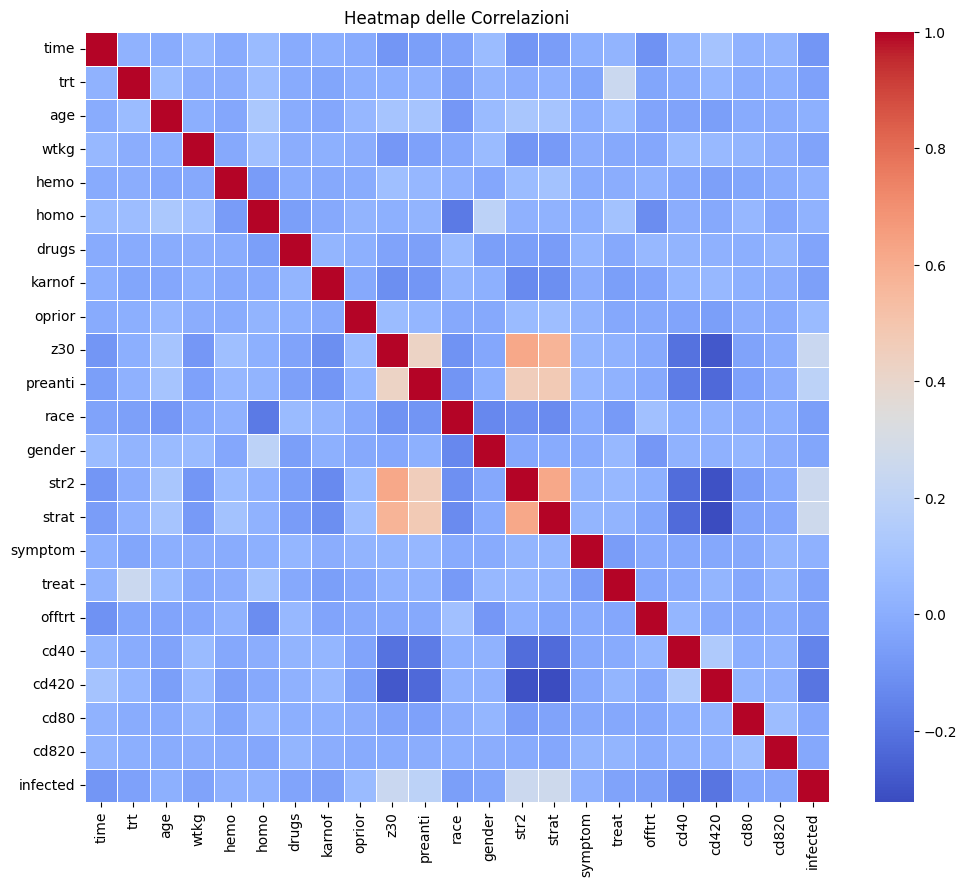

In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap delle Correlazioni') 
plt.show()


In [10]:
X = df.drop(columns='infected')
y = df.infected

In [11]:
# Numerical columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns.to_list())

['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820']


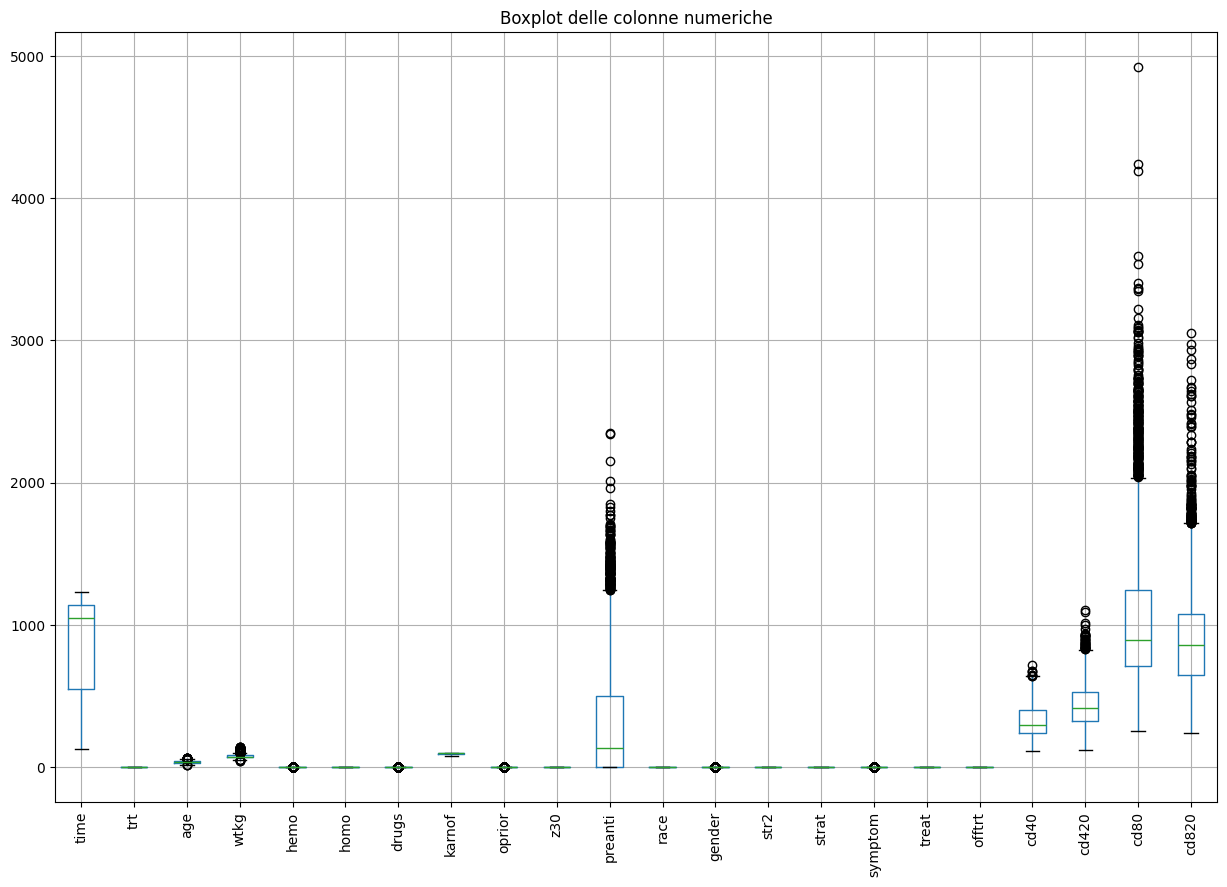

In [12]:
# Boxplot
plt.figure(figsize=(15, 10))
X[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [13]:
X_num = X[numeric_columns]
num_not_dummy_cols = X_num.columns[X_num.nunique() > 2]
X_num = X_num[num_not_dummy_cols]
normalized_df=(X_num-X_num.min())/(X_num.max()-X_num.min())
normalized_df.head()

,time,trt,age,wtkg,karnof,preanti,strat,cd40,cd420,cd80,cd820
0,0.780488,0.666667,0.60,0.277649,1.000000,0.387495,1.0,0.291181,0.293401,0.346467,0.509046
1,0.261066,1.000000,0.36,0.286943,1.000000,0.176095,0.0,0.650582,0.331980,0.239829,0.101809
2,0.898826,0.000000,0.50,0.297900,0.545455,0.344534,1.0,0.638935,0.429442,0.076445,0.439163
3,0.502258,1.000000,0.44,0.260143,1.000000,0.000000,0.0,0.329451,0.364467,0.113062,0.266407
4,0.830172,1.000000,0.46,0.188951,1.000000,0.001276,0.0,0.369384,0.651777,0.095503,0.531749


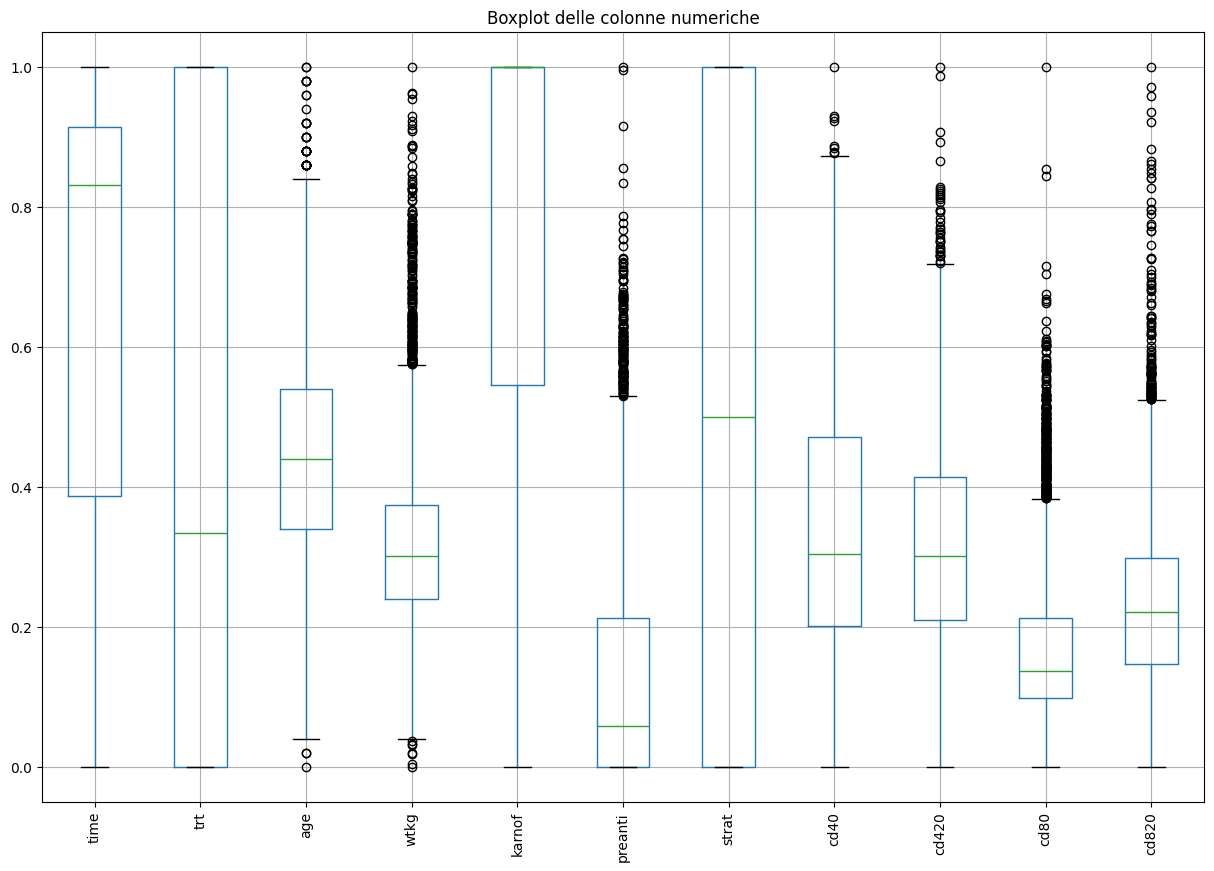

In [14]:
plt.figure(figsize=(15, 10))
normalized_df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [15]:
df_pos= df[df["infected"] == 1]
desired_dimension = round(df_pos.shape[0]/4*6)

df_neg = df[df["infected"] == 0]
df_neg = df_neg.sample(n = desired_dimension, random_state = 42)
df = pd.concat([df_pos, df_neg])
df.shape

(3947, 23)

In [16]:
#US-15
X = df.drop(columns='infected')
y = df.infected
X

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
7,1061,2,36,60.91513,0,1,0,90,0,1,...,1,1,3,0,1,0,232,295,1985,1407
9,553,1,46,62.11188,0,1,0,90,0,1,...,1,1,3,0,1,0,268,182,1317,959
21,1081,0,27,71.46741,0,1,0,100,0,0,...,1,0,1,1,0,0,315,358,509,444
26,317,0,38,83.49381,0,1,0,100,0,1,...,1,1,3,0,0,1,329,222,833,471
39,550,0,27,80.65015,0,0,0,100,0,1,...,1,1,2,0,1,0,154,921,1025,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,372,3,36,73.66011,0,0,1,100,0,1,...,1,1,3,0,1,0,156,280,575,751
1665,927,2,31,67.06614,0,0,0,100,0,1,...,1,1,1,0,1,1,360,316,1045,473
3233,1019,2,33,84.41231,0,1,0,100,0,0,...,1,0,1,1,1,0,490,634,1076,660
601,1154,3,34,73.94789,0,0,0,90,0,0,...,1,0,1,0,1,1,292,335,1005,1659


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3157, 22)
(790, 22)


In [18]:
clf = skl_lm.LogisticRegression()
clf.fit(X_train,y_train)

c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
#US-17
def rfe_selection(X, y, k):
    model = LogisticRegression(max_iter=10000, solver="newton-cholesky")
    rfe = RFE(model, n_features_to_select=k)
    rfe = rfe.fit(X, y)
    selected_features = X.columns[rfe.get_support(indices=True)]
    return X[selected_features]




In [21]:
def skb_selection(X, y, k):
    skb = SelectKBest(score_func=f_classif, k = k)
    skb = skb.fit(X, y)
    selected_features = X.columns[skb.get_support(indices=True)]
    return X[selected_features]

# Ciclo per rfe
Facciamo un ciclo per k. Andiamo quindi a far assumere alla variabile k valori da 1 (il minimo di feature che può avere un modello) fino al numero di variabili che abbiamo a disposizione "len(X.columns)". NB: il "+1" serve a farci selezionare anche il numero esatto delle colonne del dataset

In [38]:
accuracies = []

for k in range(1,len(X.columns)+1): 
    # selezioniamo le k variabili
    X_selected = rfe_selection(X=X_train, y=y_train, k=k)
    
    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(pd.DataFrame(X_selected))
    
    # facciamo il fitting del modello 
    model = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit()

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)
    
    # trasformiamo le probabilità in variabili binarie (0-1)
    y_pred = (y_pred > 0.5).astype(int)
    
    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train, y_pred)
    
    # lo aggiungiamo alla lista 
    accuracies.append(accuracy)
    print(accuracy)

Optimization terminated successfully.
         Current function value: 0.636358
         Iterations 5
0.6034209692746278
Optimization terminated successfully.
         Current function value: 0.627841
         Iterations 5
0.6240101362052581
Optimization terminated successfully.
         Current function value: 0.626138
         Iterations 5
0.6240101362052581
Optimization terminated successfully.
         Current function value: 0.623263
         Iterations 5
0.6316122901488755
Optimization terminated successfully.
         Current function value: 0.618650
         Iterations 5
0.647450110864745
Optimization terminated successfully.
         Current function value: 0.617942
         Iterations 5
0.6499841621792841
Optimization terminated successfully.
         Current function value: 0.617046
         Iterations 5
0.6471333544504276
Optimization terminated successfully.
         Current function value: 0.616683
         Iterations 5
0.6430155210643016
Optimization terminated successfu

In [39]:
for i in accuracies:
    print(i)

0.6034209692746278
0.6240101362052581
0.6240101362052581
0.6316122901488755
0.647450110864745
0.6499841621792841
0.6471333544504276
0.6430155210643016
0.6439657903072538
0.6471333544504276
0.6468165980361102
0.6458663287931581
0.6455495723788407
0.647450110864745
0.6430155210643016
0.6426987646499842
0.6566360468799494
0.6547355083940449
0.6544187519797275
0.6607538802660754
0.6566360468799494
0.6582198289515363


In [24]:
accuracies = []
model = LogisticRegression(max_iter=5000)
for k in range(1,len(X.columns)+1):
    X_selected = skb_selection(X=X_train, y=y_train, k=k)
    model.fit(X_selected, y_train)
    y_pred = model.predict(X_selected)
    accuracy = metrics.accuracy_score(y_train, y_pred)
    accuracies.append(accuracy)
    print(accuracy)

0.6255939182768451
0.636046879949319
0.6414317389927146
0.6522014570795058
0.649033892936332
0.6430155210643016
0.6528349699081406
0.6547355083940449
0.6522014570795058
0.6544187519797275
0.6598036110231232
0.662020905923345
0.6585365853658537
0.6623376623376623
0.6610706366803928


c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6607538802660754


c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.660437123851758


c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6626544187519797


c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6613873930947102


c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6601203674374406


c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6639214444092493
0.662020905923345


c:\Users\letiz\OneDrive\Desktop\DevelHope\projects\AIDS_VirusInfectionPrediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
